In [77]:
import os
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import networkx as nx
from matplotlib import pyplot as plt
from bctpy.bct.utils.other import threshold_proportional

In [2]:
def pearson_corr_with_pval(C):
    corr = np.zeros((len(C), len(C)))
    pval = np.zeros((len(C), len(C)))

    for i in range(len(C)):
        for j in range(len(C)):
            corr[i][j], pval[i][j] = pearsonr(C[i], C[j])
    return corr, pval

In [64]:
# C = np.load('../Glasser180ts_run1_npy/sub-01.npy')
C = np.load('../AAL116ts_run1_npy/sub-01.npy')

In [65]:
corr, pval = pearson_corr_with_pval(C)

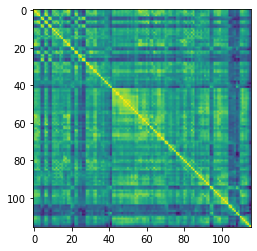

In [5]:
plt.imshow(corr)

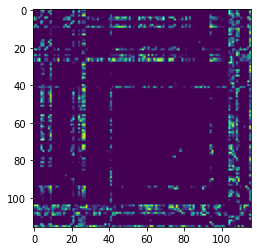

In [6]:
plt.imshow(pval)

https://github.com/brainspaces/aal116/blob/master/aal116NodeNames.txt

In [22]:
index_Insula_L = 28
index_Insula_R = 29

index_Cingulum_Ant_L = 30
index_Cingulum_Ant_R = 31
index_Cingulum_Mid_L = 32
index_Cingulum_Mid_R = 33
index_Cingulum_Post_L = 34
index_Cingulum_Post_R = 35

index_Caudate_L = 70
index_Caudate_R = 71
index_Putamen_L = 72
index_Putamen_R = 73

In [19]:
results_df = pd.read_csv('../all_results_JASP_output21.csv')
results_df = results_df[:57]

In [20]:
results_df.tail()

,Participant ID,Control/Patient,Completed full study,Gender,DOB,age,CRP,ESR,RheumatoidFactor,DAS score translated,...,preSMA_PPE,preSMA_RPE-PPE,preSMApeak_RPE,preSMApeak_PPE,preSMApk_RPE-PPE,LRr*R,LRp*P,age_demeaned,P_demean,R_demean
52,P75,Control,y,Female,21/12/1957,61.0,0.0,12.0,0.0,2.02 (remission),...,0.7886,-0.1553,1.2750,1.3200,-0.0450,4.695488,2.912513,8.32,-2.322121,-2.448194
53,P76,Control,y,Female,23/02/1972,46.0,0.0,5.0,0.0,1.13 (remission),...,0.6475,-1.0993,0.3530,0.8633,-0.5103,7.734734,4.707469,-6.68,0.608655,2.483694
54,P78,Control,y,Male,20/07/1979,39.0,0.0,4.0,0.0,NaN,...,0.7121,-0.6074,0.1083,1.1270,-1.0187,1.921451,2.832947,-13.68,-4.235522,-8.746788
55,P79,Control,y,Female,20/09/1970,48.0,0.0,7.0,0.0,NaN,...,1.2560,-1.7586,-0.5731,1.3140,-1.8871,4.297163,0.415976,-4.68,-7.110546,-3.363680
56,P80,Control,y,Female,13/05/1961,57.0,5.0,22.0,0.0,NaN,...,1.2500,-0.0300,1.7480,1.4200,0.3280,5.184762,2.385175,4.32,-1.330016,2.383224


In [107]:
adj_mat = corr
for j in range(num_ROIs):
    for j in range(num_ROIs):
        adj_mat[j][j] = 0

thresholded_adj_mat_pval_based = np.zeros_like(adj_mat)
binarized_adj_mat_pval_based = np.zeros_like(adj_mat)
thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0

for j in range(num_ROIs):
    for k in range(num_ROIs):
        if pval[j][k]:
            thresholded_adj_mat_pval_based[j][k] = corr[j][k]
            binarized_adj_mat_pval_based[j][k] = 1

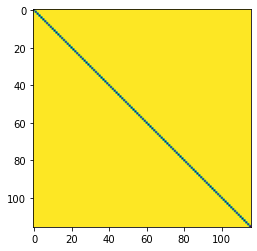

In [110]:
plt.imshow(binarized_adj_mat_pval_based)

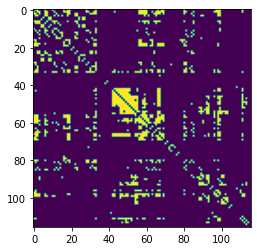

In [111]:
plt.imshow(binarized_adj_mat_top10percent)

In [139]:
num_participants = 57
num_ROIs = 116

corrs_Insula_L = np.zeros((num_participants, num_ROIs))
corrs_Insula_R = np.zeros((num_participants, num_ROIs))

corrs_Cingulum_Ant_L = np.zeros((num_participants, num_ROIs))
corrs_Cingulum_Ant_R = np.zeros((num_participants, num_ROIs))
corrs_Cingulum_Mid_L = np.zeros((num_participants, num_ROIs))
corrs_Cingulum_Mid_R = np.zeros((num_participants, num_ROIs))
corrs_Cingulum_Post_L = np.zeros((num_participants, num_ROIs))
corrs_Cingulum_Post_R = np.zeros((num_participants, num_ROIs))

corrs_Caudate_L = np.zeros((num_participants, num_ROIs))
corrs_Caudate_R = np.zeros((num_participants, num_ROIs))
corrs_Putamen_L = np.zeros((num_participants, num_ROIs))
corrs_Putamen_R = np.zeros((num_participants, num_ROIs))

# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5
network_metrics_Insula_L = np.zeros((num_participants, num_metrics))
network_metrics_Insula_R = np.zeros((num_participants, num_metrics))
network_metrics_Caudate_L = np.zeros((num_participants, num_metrics))
network_metrics_Caudate_R = np.zeros((num_participants, num_metrics))
network_metrics_Putamen_L = np.zeros((num_participants, num_metrics))
network_metrics_Putamen_R = np.zeros((num_participants, num_metrics))

# rich_club_coefficients = np.zeros(num_participants)

lst = os.listdir('../AAL116ts_run1_npy/')
lst.sort()
i=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../AAL116ts_run1_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    corrs_Insula_L[i] = corr[index_Insula_L]
    corrs_Insula_R[i] = corr[index_Insula_R]
    
    corrs_Cingulum_Ant_L[i] = corr[index_Cingulum_Ant_L]
    corrs_Cingulum_Ant_R[i] = corr[index_Cingulum_Ant_R]
    corrs_Cingulum_Mid_L[i] = corr[index_Cingulum_Mid_L]
    corrs_Cingulum_Mid_R[i] = corr[index_Cingulum_Mid_R]
    corrs_Cingulum_Post_L[i] = corr[index_Cingulum_Post_L]
    corrs_Cingulum_Post_R[i] = corr[index_Cingulum_Post_R]
    
    corrs_Caudate_L[i] = corr[index_Caudate_L]
    corrs_Caudate_R[i] = corr[index_Caudate_R]
    corrs_Putamen_L[i] = corr[index_Putamen_L]
    corrs_Putamen_R[i] = corr[index_Putamen_R]
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_adj_mat_pval_based = np.zeros_like(adj_mat)
    binarized_adj_mat_pval_based = np.zeros_like(adj_mat)
    
    for j in range(num_ROIs):
        for k in range(num_ROIs):
            if pval[j][k]:
                thresholded_adj_mat_pval_based[j][k] = corr[j][k]
                binarized_adj_mat_pval_based[j][k] = 1
                
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
                
    graph = nx.from_numpy_matrix(binarized_adj_mat_top10percent)
    

    network_metrics_Insula_L[i] = np.array([nx.degree_centrality(graph)[index_Insula_L], 
                                           nx.eigenvector_centrality(graph)[index_Insula_L], 
                                           nx.betweenness_centrality(graph)[index_Insula_L],
                                           nx.closeness_centrality(graph)[index_Insula_L],
                                           nx.load_centrality(graph)[index_Insula_L]])
    
    network_metrics_Insula_R[i] = np.array([nx.degree_centrality(graph)[index_Insula_R], 
                                           nx.eigenvector_centrality(graph)[index_Insula_R], 
                                           nx.betweenness_centrality(graph)[index_Insula_R],
                                           nx.closeness_centrality(graph)[index_Insula_R],
                                           nx.load_centrality(graph)[index_Insula_R]])
    
    network_metrics_Caudate_L[i] = np.array([nx.degree_centrality(graph)[index_Caudate_L], 
                                           nx.eigenvector_centrality(graph)[index_Caudate_L], 
                                           nx.betweenness_centrality(graph)[index_Caudate_L],
                                           nx.closeness_centrality(graph)[index_Caudate_L],
                                           nx.load_centrality(graph)[index_Caudate_L]])
    
    network_metrics_Caudate_R[i] = np.array([nx.degree_centrality(graph)[index_Caudate_R], 
                                           nx.eigenvector_centrality(graph)[index_Caudate_R], 
                                           nx.betweenness_centrality(graph)[index_Caudate_R],
                                           nx.closeness_centrality(graph)[index_Caudate_R],
                                           nx.load_centrality(graph)[index_Caudate_R]])
    
    network_metrics_Putamen_L[i] = np.array([nx.degree_centrality(graph)[index_Putamen_L], 
                                           nx.eigenvector_centrality(graph)[index_Putamen_L], 
                                           nx.betweenness_centrality(graph)[index_Putamen_L],
                                           nx.closeness_centrality(graph)[index_Putamen_L],
                                           nx.load_centrality(graph)[index_Putamen_L]])
    
    network_metrics_Putamen_R[i] = np.array([nx.degree_centrality(graph)[index_Putamen_R], 
                                           nx.eigenvector_centrality(graph)[index_Putamen_R], 
                                           nx.betweenness_centrality(graph)[index_Putamen_R],
                                           nx.closeness_centrality(graph)[index_Putamen_R],
                                           nx.load_centrality(graph)[index_Putamen_R]])
    
#     rich_club_coefficients[i] = nx.rich_club_coefficient(graph)
    i+=1

sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [140]:
P_demean = np.array(results_df['P_demean'])
R_demean = np.array(results_df['R_demean'])

In [141]:
for node in range(num_ROIs):
    corr, pval = pearsonr(corrs_Cingulum_Post_R[:, node], P_demean)
    
    if pval<0.05:
        print(corr, pval, node+1)

0.26364025768334004 0.04752926554427294 9


/Users/jwp968/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [142]:
for metric in range(num_metrics):
    corr, pval = pearsonr(network_metrics_Putamen_R[:, metric], P_demean)
    
    print(corr, pval, metric)

-0.13812153376796849 0.3055457270803379 0
-0.11041669249281849 0.41354932240081943 1
0.032069525428795875 0.8127992163329518 2
-0.2350838264333518 0.07835965083702674 3
0.019447068056982764 0.8858298624202674 4
